In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Sample_ Superstore.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.head()
df.info()
df.describe()

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print("Total Sales:", round(total_sales, 2))
print("Total Profit:", round(total_profit, 2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    4042 non-null   datetime64[ns]
 3   Ship Date     9994 non-null   object        
 4   Ship Mode     9994 non-null   object        
 5   Customer ID   9994 non-null   object        
 6   Segment       9994 non-null   object        
 7   Country       9994 non-null   object        
 8   City          9994 non-null   object        
 9   State         9994 non-null   object        
 10  Region        9994 non-null   object        
 11  Product ID    9994 non-null   object        
 12  Category      9994 non-null   object        
 13  Sub-Category  9994 non-null   object        
 14  Product Name  9994 non-null   object        
 15  Sales         9994 non-null   float64 

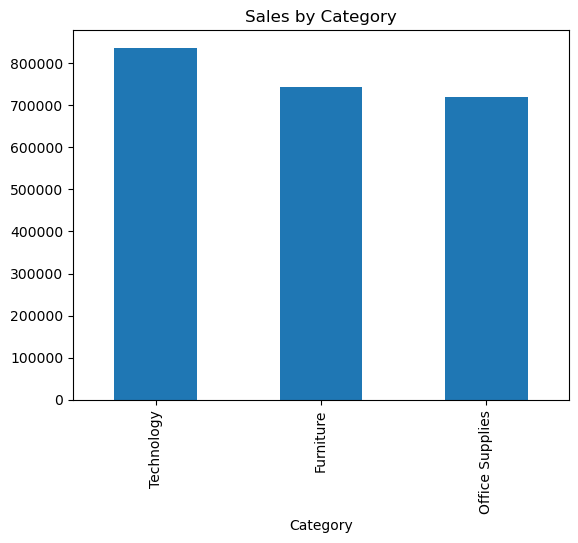

In [5]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', title='Sales by Category')
plt.show()
region_profit = df.groupby('Region')['Profit'].sum().sort_values()

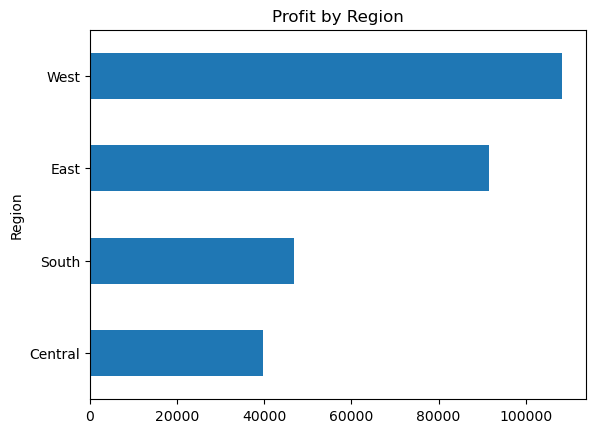

In [7]:
region_profit.plot(kind='barh', title='Profit by Region')
plt.show()

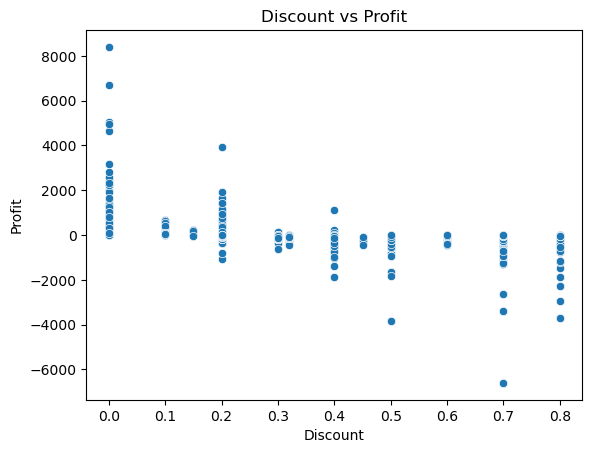

In [8]:
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()

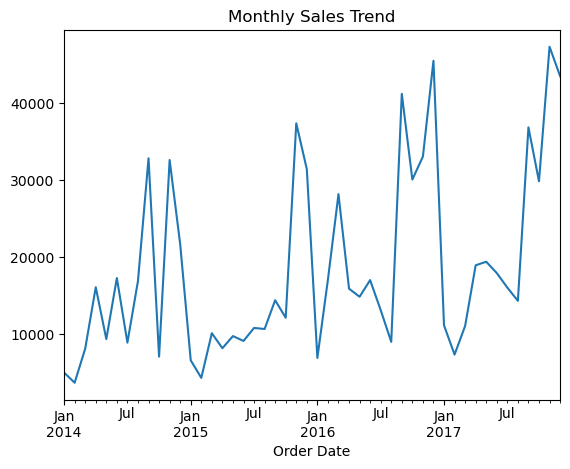

In [9]:
monthly_sales = (
    df.set_index('Order Date').resample('M')['Sales'].sum()
)

monthly_sales.plot(title="Monthly Sales Trend")
plt.show()

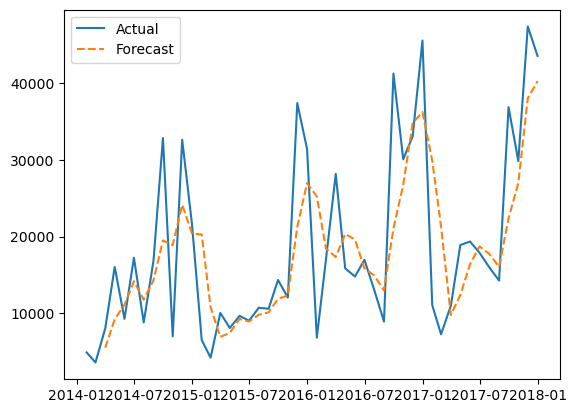

In [10]:
forecast = monthly_sales.rolling(window=3).mean()

plt.plot(monthly_sales, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()